In [54]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# 1.数据准备
pro = ts.pro_api("20231208200557-1a9c3fbc-4615-474e-8445-26c2a0019fc0")
pro._DataApi__http_url = "http://tsapi.majors.ltd:7000"
# ts_pro._DataApi__http_url = "http://tsapi.majors.ltd:7000"
# 螺纹钢期货id
# "RB1911",
ids = ["RB1911", "RB1912", "RB2001", "RB2002", "RB2003", "RB2004"]
# 起止日期
start_date = "20190416"
end_date = "20211115"
# 用于合并所有数据
all_df = pd.DataFrame()
# 获取历史数据
for id in ids:
    # 拼接为ts_code格式
    ts_code = id + ".SHF"
    # 调用接口
    df = ts.pro_bar(
        api=pro,
        ts_code=ts_code,
        start_date=start_date,
        end_date=end_date,
        asset="FT",
        freq="D",
    )
    df = df.reindex(index=df.index[::-1])
    # 获取收盘价
    df = df[["trade_date", "close"]]
    df.columns = ["trade_date", id]
    df = df.set_index("trade_date")
    # 合并DataFrame
    all_df = pd.concat((all_df, df), axis=1)
    # 暂停进程30秒
    time.sleep(2)

In [62]:
all_df

,trade_date,RB1911,RB1912,RB2001,RB2002,RB2003,RB2004
0,20190416,3711.0,3617.0,3542,3479,3479,3482
1,20190417,3713.0,3621.0,3550,3472,3470,3460
2,20190418,3640.0,3546.0,3465,3408,3405,3405
3,20190419,3650.0,3555.0,3494,3433,3430,3422
4,20190422,3690.0,3595.0,3518,3453,3458,3438
...,...,...,...,...,...,...,...
181,20200109,NaN,NaN,3766,3606,3625,3608
182,20200110,NaN,NaN,3881,3655,3645,3630
183,20200113,NaN,NaN,3801,3645,3620,3605
184,20200114,NaN,NaN,3925,3683,3657,3615


In [60]:
all_df.to_csv('./six_data.csv')

In [61]:
all_df = pd.read_csv('./six_data.csv')

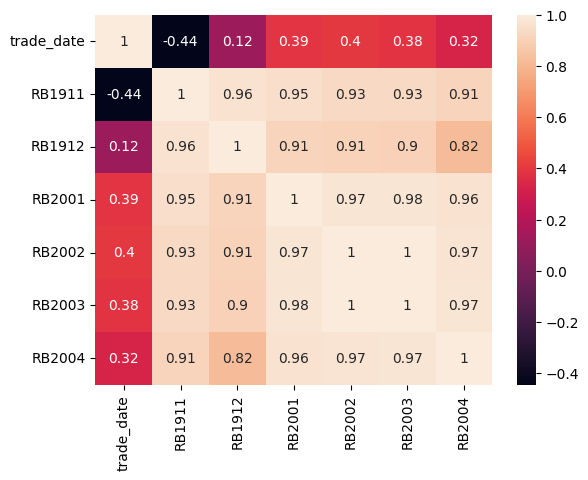

In [63]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

df_all = pd.read_csv('./six_data.csv')
sns.heatmap(df_all.corr(), annot=True)
plt.show()

In [38]:
df_all = df_all.dropna()

In [64]:
#检验两个序列是否具有协整关系之前需要先对它们进行平稳性检验
from statsmodels.tsa.api import adfuller
import numpy as np

# 原序列ADF检验
print(adfuller(df_all['RB2001']))
print(adfuller(df_all['RB2002']))
# 一阶差分后ADF检验
print(adfuller(np.diff(df_all['RB2001'])))
print(adfuller(np.diff(df_all['RB2002'])))
"""
可以看到原序列是不平稳的，但是它们的一阶差分后得到的序列是平稳的。
"""

(-1.4425210922931517, 0.5617298818351919, 2, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, 1756.4934628250694)
(-1.0558523668226643, 0.7323527368034001, 0, 185, {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.575167750182615}, 1665.657725822143)
(-15.674224880230792, 1.4997585212929492e-28, 0, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 1756.331854106653)
(-15.161664393745173, 6.577448821975833e-28, 0, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 1664.3625243667007)


'\n可以看到原序列是不平稳的，但是它们的一阶差分后得到的序列是平稳的。\n'

In [65]:
# 协整性检验
from statsmodels.tsa.api import coint

print(coint(df_all["RB2001"], df_all["RB2002"]))

(-2.931919860821757, 0.12728786765519828, array([-3.95661907, -3.36935692, -3.06745488]))


In [69]:
def CorrIntest(dataA, dataB):
    """协整性检验"""
    result = coint(dataA, dataB)
    t_statistic = result[0]
    p_value = result[1]
    critical_values = result[2]
    print('statistic value:', t_statistic)
    print('p value:', p_value)
    print('critical_values:', critical_values)
    if t_statistic < critical_values[0]:
        print("在1%置信度下拒绝原假设，两序列数据协整")
    elif critical_values[0] < t_statistic and critical_values[1] > t_statistic:
        print("在5%置信程度下拒绝原假设，两序列数据协整")
    elif critical_values[1] < t_statistic and critical_values[2] > t_statistic:
        print("在10%置信程度下不能拒绝原假设，两序列不协整")
    elif t_statistic > critical_values[2]:
        print('在10%置信程度下不能拒绝原假设，两序列不能协整')

def ADFTest(data):
    result = adfuller(data)
    t_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    print('statistic value:', t_statistic)
    print('p value:', p_value)
    print('critical_values:', critical_values)
    if t_statistic < critical_values['1%']:
        print("在1%置信程度下拒绝原假设，序列平稳")
    elif t_statistic > critical_values['10%']:
        print("在10%置信程度下不能拒绝原假设，序列数据不平稳")

In [74]:
CorrIntest(df_all["RB2002"], df_all["RB2003"])
ADFTest(np.diff(df_all["RB2002"]))
ADFTest(np.diff(df_all["RB2003"]))

statistic value: -6.369639830856022
p value: 2.484738015109007e-07
critical_values: [-3.95661907 -3.36935692 -3.06745488]
在1%置信度下拒绝原假设，两序列数据协整
statistic value: -15.161664393745173
p value: 6.577448821975833e-28
critical_values: {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}
在1%置信程度下拒绝原假设，序列平稳
statistic value: -14.189201289113488
p value: 1.8696112349824706e-26
critical_values: {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}
在1%置信程度下拒绝原假设，序列平稳


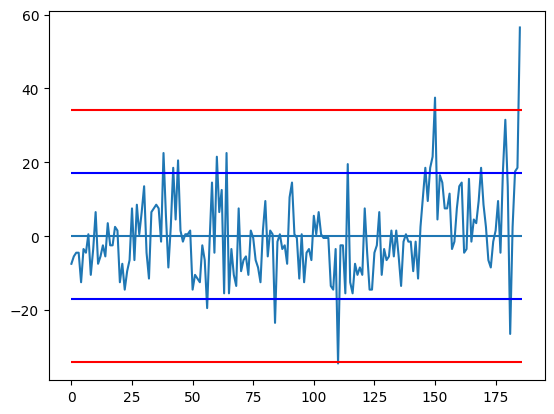

'\n以1.75倍标准差作为开仓阈值，三倍标准差作为止损阈值。\n'

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

price_A = df_all['RB2002']
price_B = df_all['RB2003']
# 计算去中心化差价
spread = price_A - price_B
mspread = spread - spread.mean()
# 可视化去中心差价
fig = plt.plot()
# 可视化去中心插件及开仓和止损阈值
sigma = mspread.std()
plt.plot(mspread)
plt.hlines(0, 0, len(mspread))
plt.hlines(1.5*sigma, 0, len(mspread), colors='b')
plt.hlines(-1.5*sigma, 0, len(mspread), color='b')
plt.hlines(3*sigma, 0, len(mspread), color='r')
plt.hlines(-3*sigma, 0, len(mspread), color='r')
plt.show()
"""
以1.75倍标准差作为开仓阈值，三倍标准差作为止损阈值。
"""

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

price_A = df_all['RB2002']
price_B = df_all['RB2003']
# 计算区中心化差价
price_A = price_A.values
price_B = price_B.values
spread = price_A - price_B
mspread = spread - np.mean(spread)
# 设定开仓和止损阈值
sigma = np.std(mspread)
open = 1.5 * sigma
stop = 3.*sigma
# 累计收益表
profit_cum_list = []
# 每个时刻的累计收益
profit_cum = 0
# 是否持仓
hold = False
# 持仓状态
hold_state = 0 # 1 (A:long, B:short) -1 (A：short B：long)
# 持仓价格
hold_price_A = 0
hold_price_B = 0


In [83]:
for i in range(len(price_A)):
    # 如果没有持仓
    if hold == False:
        if mspread[i] > open: # 买
            hold_price_A = price_A[i]
            hold_price_B = price_B[i]
            hold_state = -1
            hold = True
        elif mspread[i] < -open:
            hold_price_A = price_A[i]
            hold_price_B = price_B[i]
            hold_state = 1
            hold = True
    else:
        if mspread[i] >= stop and hold_state == -1:
            profit = (hold_price_A - price_A[i]) + (price_B[i] - hold_price_B)
            profit_cum += profit
            hold_state = 0
            hold = False
        if mspread[i] <= -stop and hold_state == 1:
            profit = (price_A[i] - hold_price_A) + (hold_price_B - price_B[i])
            profit_cum += profit
            hold_state = 0
            hold = False
        if mspread[i] <= 0 and hold_state == -1:
            profit = (hold_price_A - price_A[i]) + (price_B[i] - hold_price_B)
            profit_cum += profit
            hold_state = 0
            hold = False
        if mspread[i] >= 0 and hold_state == 1:
            profit = (price_A[i] - hold_price_A) + (hold_price_B - price_B[i])
            profit_cum += profit
            hold_state = 0
            hold = False
    profit_cum_list.append(profit_cum)


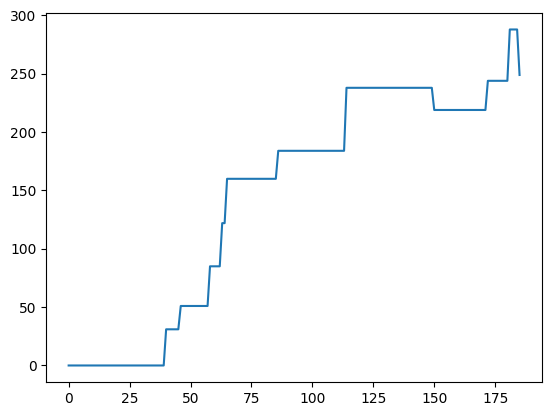

In [85]:
# 可视化收益结果
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(profit_cum_list)), profit_cum_list)
plt.show()

In [86]:
import numpy as np
from collections import deque

class Strategy():
    def __init__(self, window_len=50, k_open=1.5, k_stop=3):
        # 滑动窗口
        self.window_len = window_len
        # 开平仓阈值
        self.k_open = k_open
        self.k_stop = k_stop
        # 两种数据的滑动窗口
        self.A_buffer_queue = deque(maxlen=self.window_len)
        self.B_buffer_queue = deque(maxlen=self.window_len)
        # 价差列表
        self.mspread_list = []
        # 开仓止损阈值列表
        self.open_threshold_list = []
        self.stop_threshold_list = []

    # 记录数据
    def store_data(self, mspread, open_threshold, stop_threshold):
        self.mspread_list.append(mspread)
        self.open_threshold_list.append(open_threshold)
        self.stop_threshold_list.append(stop_threshold)

    # 传入新数据，返回对新数据的操作指令
    def feed(self, price_A, price_B, position):
        if len(self.A_buffer_queue) < self.window_len:
            self.A_buffer_queue.append(price_A)
            self.B_buffer_queue.append(price_B)
            return 0
        self.A_buffer_queue.append(price_A)
        self.B_buffer_queue.append(price_B)
        A_buffer_array = np.array(self.A_buffer_queue)
        B_buffer_array = np.array(self.B_buffer_queue)
        # 计算滑动窗口内的价差及阈值
        spread = A_buffer_array - B_buffer_array
        mspread = spread - np.mean(spread)
        sigma = np.std(mspread)
        open_threshold = self.k_open * sigma
        stop_threshold = self.k_stop * sigma
        # 记录数据
        self.store_data(mspread[-1], open_threshold, stop_threshold)
        # 如果持仓
        if position.hold:
            # 如果持仓状态是A空B多
            if position.state == -1:
                # 平仓
                if mspread[-1] <= 0:
                    return "closeAshortBlong"
                # 止损
                elif mspread[-1] > stop_threshold:
                    return "stopAshortBlong"
                else:
                    return 0
            # 如果持仓状态是A多B空
            elif position.state == 1:
                # 平仓
                if mspread[-1] >= 0:
                    return 'closeAlongBshort'
                # 止损
                elif mspread[-1] < -stop_threshold:
                    return 'closeAlongBshort'
                else:
                    return 0
            else:
                return 0
        else: # 如果没有持仓
            # 开仓A空B多
            if mspread[-1] > open_threshold:
                return "openAshortBlong"
            # 开仓A多B空
            elif mspread[-1] < -open_threshold:
                return "openAlongBshort"
            else:
                return 0
            

In [93]:
import ffn


# 仓位主体，监控回测仓位变化及统计回测结果
class Position:
    def __init__(self):
        # 持仓状态 0空仓 -1 A空B多 1 A多B空
        self.state = 0
        # 当前累计收益
        self.profit = 0
        # 累计收益列表
        self.profit_list = []
        # 持仓价格
        self.hold_A_price = 0
        self.hold_B_price = 0
        self.hold = False
        # 交易次数
        self.tradeNum = 0
        # 盈利次数
        self.winNum = 0
        # 损失次数
        self.lossNum = 0

    # 追加累计收益
    def append_profit(self, profit):
        self.profit_list.append(profit)

    # 展示交易记录图像
    def showTradeRecord(self, mspread, open, stop):
        fig = plt.figure()
        # 收益图
        ax1 = fig.add_subplot(211)
        ax1.plot(range(len(self.profit_list)), self.profit_list)
        ax1.set_title("Profit Record")
        # 开仓和止损阈值
        ax2 = fig.add_subplot(212)
        open = np.array(open)
        stop = np.array(stop)
        ax2.plot(range(len(mspread)), mspread)
        ax2.plot(range(len(open)), open, c="r")
        ax2.plot(range(len(stop)), stop, c="b")
        ax2.plot(range(len(open)), -open, c="r")
        ax2.plot(range(len(stop)), -stop, c="b")
        ax2.set_title("mspread & open threshold & stop threshold")
        ax2.legend(["mspread", "open", "stop"])
        plt.tight_layout()
        plt.show()

    # 计算最大回撤率
    def cal_maxDrawdown(self, profit_list):
        profit_series = pd.Series(data=profit_list)
        return ffn.calc_max_drawdown(profit_series)

    # 计算夏普比率
    def calc_sharpeRatio(self, profit_list):
        profit_series = pd.Series(data=profit_list)
        return ffn.calc_sharpe(profit_series)

    # 输出回测结果
    def printResult(self):
        winRate = self.winNum / self.tradeNum
        maxDrawn = self.cal_maxDrawdown(self.profit_list)
        # sharpeRatio = self.calc_sharpeRatio(self.profit_list)
        print('交易次数：', self.tradeNum)
        print('盈利次数', self.winNum)
        print('胜率', winRate)
        print('最大回撤率:', maxDrawn)
        # print('夏普比率：', sharpeRatio)

交易次数： 11
盈利次数 9
胜率 0.8181818181818182
最大回撤率: -0.12385321100917435


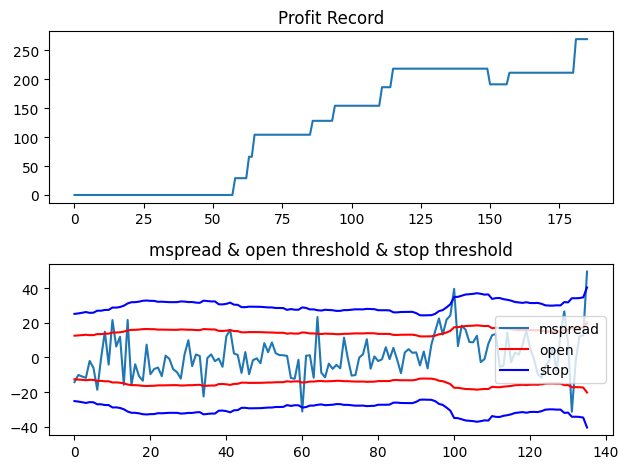

In [94]:
price_A = all_df['RB2002'].values
price_B = all_df['RB2003'].values
s = Strategy()
position = Position()

for i in range(len(price_A)):
    a = price_A[i]
    b = price_B[i]
    # 获取交易指令
    cmd = s.feed(a,b,position)
    if cmd == 'openAshortBlong':
        position.hold_A_price = a
        position.hold_B_price = b
        position.state = -1
        position.hold = True
        position.tradeNum += 1
    elif cmd == 'stopAshortBlong':
        profit_A = position.hold_A_price - a
        profit_B = b - position.hold_B_price
        position.profit += profit_A
        position.profit += profit_B
        position.state = 0
        position.hold = False
        position.lossNum += 1
    elif cmd == "closeAshortBlong":
        profit_A = position.hold_A_price - a
        profit_B = b - position.hold_B_price
        position.profit += profit_A
        position.profit += profit_B
        position.state = 0
        position.hold = False
        position.winNum += 1
    elif cmd == "openAlongBshort":
        position.hold_A_price = a
        position.hold_B_price = b
        position.state = 1
        position.hold = True
        position.tradeNum += 1
    elif cmd == "stopAlongBshort":
        profit_A = a - position.hold_A_price
        profit_B = position.hold_B_price - b
        position.profit += profit_A
        position.profit += profit_B
        position.state = 0
        position.hold = False
        position.lossNum += 1
    elif cmd == "closeAlongBshort":
        profit_A = a - position.hold_A_price
        profit_B = position.hold_B_price - b
        position.profit += profit_A
        position.profit += profit_B
        position.state = 0
        position.hold = False
        position.winNum += 1
    elif cmd == 0:
        pass
    position.append_profit(position.profit)

position.printResult()
position.showTradeRecord(s.mspread_list, s.open_threshold_list, s.stop_threshold_list)